In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import re
from matplotlib import pyplot as pp

In [2]:
path = "Wellbeing_and_lifestyle_data_Kaggle.csv"

In [4]:
data_0 = pd.read_csv(path, sep=",", encoding="utf-8")
data_0.head(1)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5


In [5]:
data_0.shape

(15972, 24)

In [6]:
type(data_0)

pandas.core.frame.DataFrame

In [7]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [8]:
data_0['Timestamp'] = pd.to_datetime(data_0['Timestamp'])
data_0.head(3)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2015-07-07,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2015-07-07,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,2015-07-07,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6


In [9]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                15972 non-null  datetime64[ns]
 1   FRUITS_VEGGIES           15972 non-null  int64         
 2   DAILY_STRESS             15972 non-null  object        
 3   PLACES_VISITED           15972 non-null  int64         
 4   CORE_CIRCLE              15972 non-null  int64         
 5   SUPPORTING_OTHERS        15972 non-null  int64         
 6   SOCIAL_NETWORK           15972 non-null  int64         
 7   ACHIEVEMENT              15972 non-null  int64         
 8   DONATION                 15972 non-null  int64         
 9   BMI_RANGE                15972 non-null  int64         
 10  TODO_COMPLETED           15972 non-null  int64         
 11  FLOW                     15972 non-null  int64         
 12  DAILY_STEPS              15972 n

In [10]:
data = data_0.copy()
data.head(3)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2015-07-07,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2015-07-07,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,2015-07-07,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6


In [11]:
data.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [12]:
data["WORK_LIFE_BALANCE_SCORE"].describe().round()

count    15972.0
mean       667.0
std         45.0
min        480.0
25%        636.0
50%        668.0
75%        698.0
max        820.0
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64

C:\Users\Horas\AppData\Local\Temp\ipykernel_24332\3144339300.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data= data, x= 'WORK_LIFE_BALANCE_SCORE', palette='dark', alpha = .5, legend=True, kde=True);


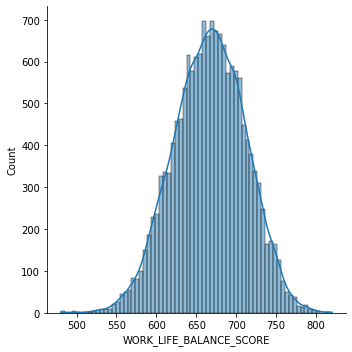

In [13]:
sns.displot(data= data, x= 'WORK_LIFE_BALANCE_SCORE', palette='dark', alpha = .5, legend=True, kde=True);


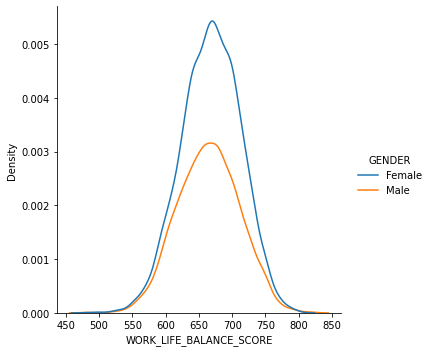

In [14]:
sns.displot(data=data, x="WORK_LIFE_BALANCE_SCORE", hue="GENDER", kind="kde");

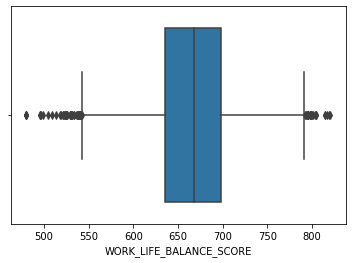

In [15]:
sns.boxplot(data= data, x= 'WORK_LIFE_BALANCE_SCORE', hue= 'GENDER', dodge=True);

In [16]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15967    False
15968    False
15969    False
15970    False
15971    False
Length: 15972, dtype: bool

Primero, veamos todas las correlaciones.

In [17]:
data_sin_wlb = data.copy()
data_sin_wlb_2 = data_sin_wlb.drop(['WORK_LIFE_BALANCE_SCORE'], axis=1)
data_sin_wlb_2.head(3)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER
0,2015-07-07,3,2,2,5,0,5,2,0,1,...,0,7,5,5,1,4,0,5,36 to 50,Female
1,2015-07-07,2,3,4,3,8,10,5,2,2,...,5,8,2,2,2,3,2,6,36 to 50,Female
2,2015-07-07,2,3,3,4,4,10,3,2,2,...,5,8,10,2,2,4,8,3,36 to 50,Female


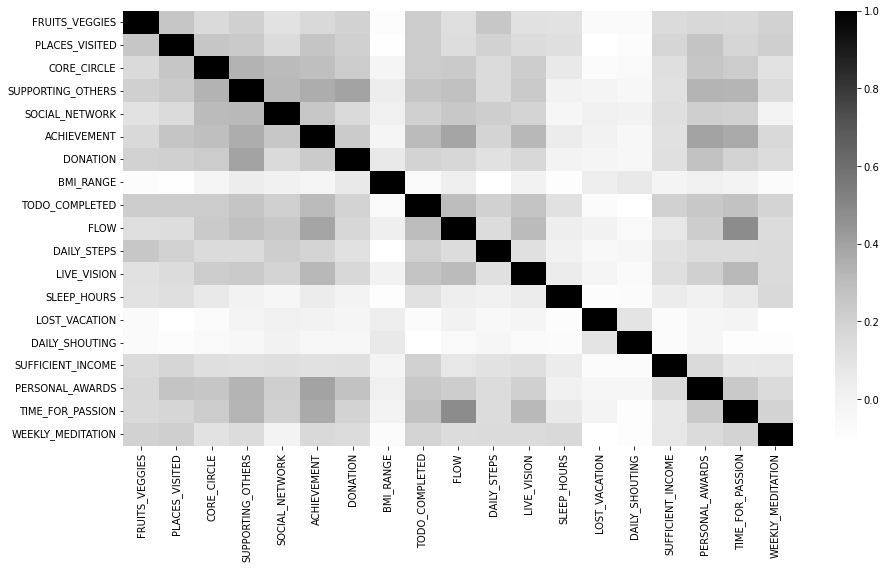

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(data=data_sin_wlb_2.corr(), annot=False, fmt='0.3f', cmap='Greys', robust=True);


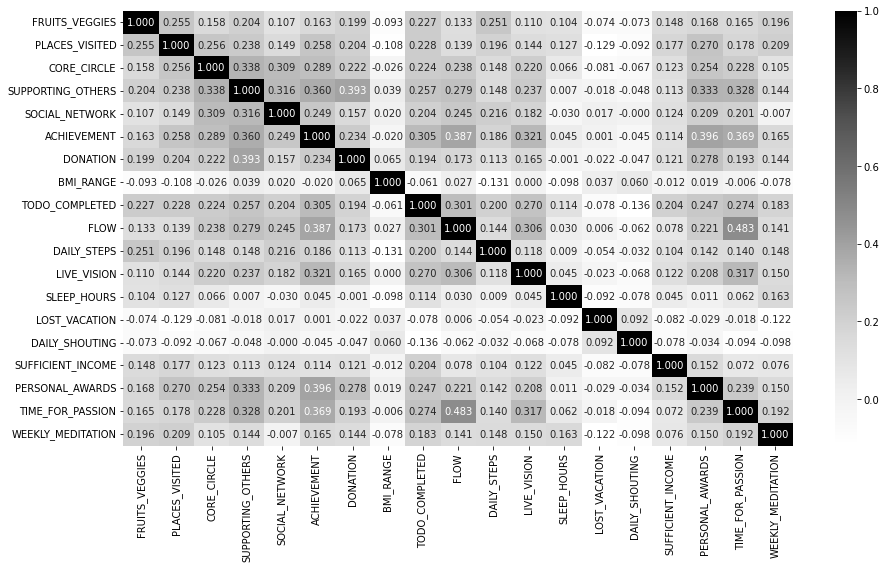

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(data=data_sin_wlb_2.corr(), annot=True, fmt='0.3f', cmap='Greys', robust=True);

Pre-proceso

In [20]:
data_0 = pd.read_csv(path_casa, sep=",", encoding="utf-8")
data_0.head(3)
data = data_0.copy()

<AxesSubplot:>

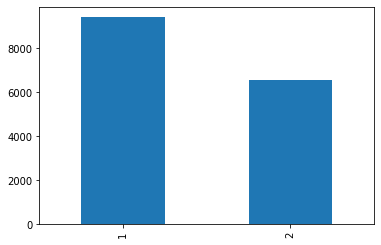

In [21]:
data['GENDER'] = data['GENDER'].map({'Female':0, 'Male':1})
data = data[data.DAILY_STRESS.apply(lambda x: x.isnumeric())]
data['DAILY_STRESS'] = data['DAILY_STRESS'].astype(int)
data['AGE'] = data['AGE'].map({'Less than 20':0, '21 to 35':1, '36 to 50':2, '51 or more':3})
data = data.drop(columns =['Timestamp'])
data['BMI_RANGE'].value_counts().plot.bar()

1- Un peso adecuado 2 - Sobrepeso
podemos ver que la población consta de más personas que tienen el peso adecuado
ahora veamos diferencias entre Categorías

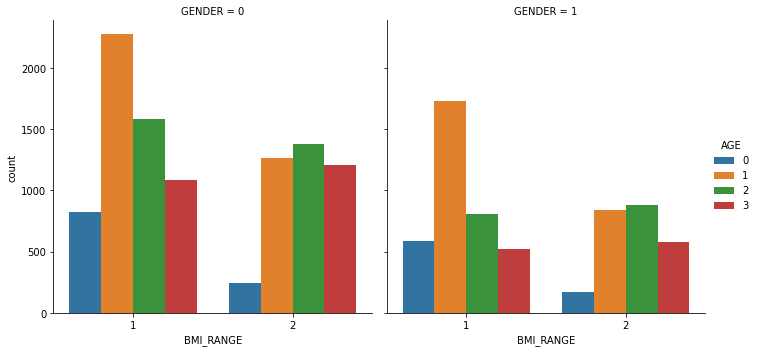

In [22]:
ax = sns.catplot(x="BMI_RANGE", kind="count", hue="AGE", col = "GENDER", data=data)
# plt.title('Índice de Masa Coporal (IMC) por género', size=5);

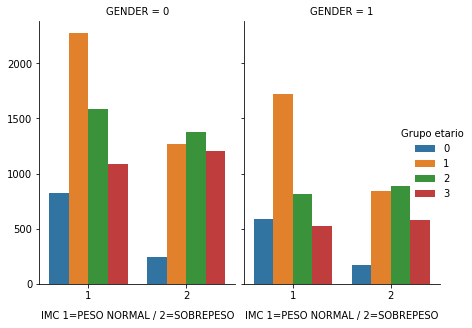

In [23]:
ax = sns.catplot(x="BMI_RANGE", kind="count", hue="AGE", col = "GENDER", data=data)
ax.set_axis_labels("IMC 1=PESO NORMAL / 2=SOBREPESO", "", labelpad=10)
ax.legend.set_title("Grupo etario")
ax.figure.set_size_inches(6.5, 4.5)


** Menos de 20: 0, 21 a 35: 1, 36 a 50: 2, 51 o más: 3
Mujer: 0, Hombre: 1**
Vemos que hay más mujeres con sobrepeso en la población que hombres. Y el sobrepeso a lo largo de los años tiende a cambiar más en la población masculina que en la femenina.
Un gran cambio se nota en los hombres de 21 a 35 y de 36 en adelante (probablemente porque es una edad posterior al matrimonio y en casa le espera buena comida) :D

Ahora veamos datos sobre el estrés diario

<AxesSubplot:xlabel='GENDER'>

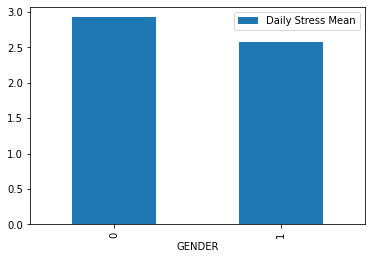

In [24]:
x = data[['DAILY_STRESS', 'GENDER']].groupby(['GENDER'])['DAILY_STRESS'].agg(['mean']).reset_index().set_index('GENDER')
x = x.rename({'mean':'Daily Stress Mean'}, axis=1)
x.plot.bar()

Vemos que las mujeres están más estresadas diariamente que los hombres en promedio
cita del informe "Alrededor de 200 000 hombres reportaron un promedio de estrés relacionado con el trabajo en los últimos tres años en comparación con 272 000 mujeres, según las cifras del HSE. Esto significa que las mujeres tenían 1,4 veces más probabilidades de sufrir estrés, ansiedad y depresión".

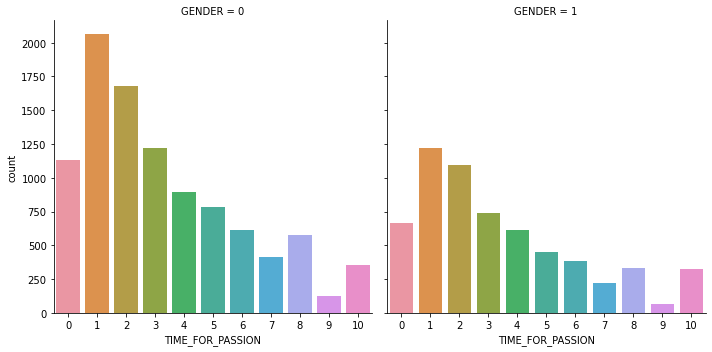

In [25]:
ax = sns.catplot(x="TIME_FOR_PASSION", kind="count", col = "GENDER", data=data)

Podemos ver aquí que las mujeres dedican menos tiempo a las pasiones durante el día.
Tal vez esto podría afectar su estrés diario.

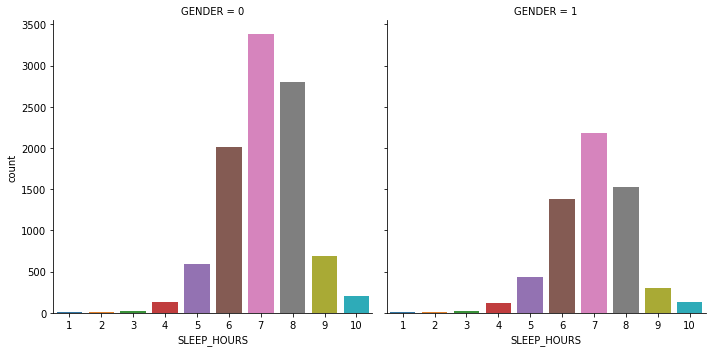

In [26]:
ax = sns.catplot(x="SLEEP_HOURS", kind="count", col = "GENDER", data=data)

In [27]:
data_5 = pd.read_csv(path_casa, sep=",", encoding="utf-8")
data_5.head(1)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5


In [28]:
data_sueno = data_5.copy()
data_sueno.head(1)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5


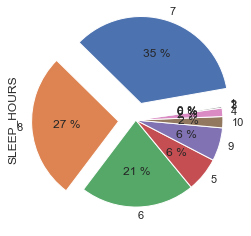

In [65]:
myexplode = [0.2, 0.2, 0, 0, 0,0,0,0,0,0]
sueno = data_sueno.SLEEP_HOURS.value_counts()
sueno.plot.pie(startangle = 10, explode = myexplode, autopct="%0.f %%" )
plt.show()

In [30]:
sueno = data_sueno.SLEEP_HOURS.value_counts()
sueno

7     5566
8     4324
6     3397
5     1025
9      987
10     333
4      252
3       49
2       21
1       18
Name: SLEEP_HOURS, dtype: int64

<AxesSubplot:ylabel='SLEEP_HOURS'>

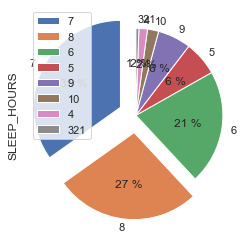

In [69]:
myexplode_2 = [0.2, 0.2, 0, 0, 0, 0, 0, 0]
df_sueno = pd.DataFrame({'SLEEP_HOURS': [5566, 4324 , 3397, 1025, 987, 333, 252, 88],
                   'COUNT': [7, 8, 6, 5, 9, 10, 4, 3_2_1 ]},
                  index=[7, 8, 6, 5, 9, 10, 4, 3_2_1])
df_sueno.plot.pie(y='SLEEP_HOURS', startangle = 90 , explode = myexplode_2 , autopct="%0.f %%" )

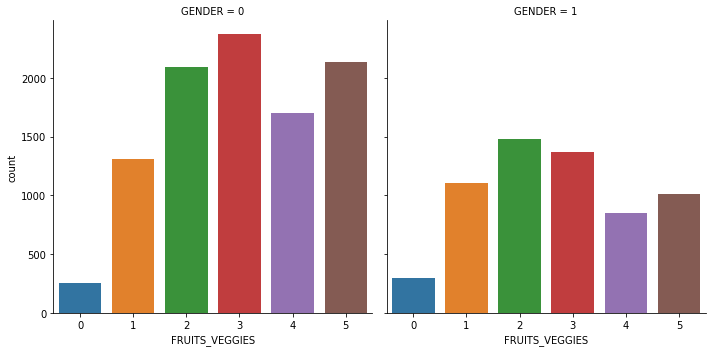

In [32]:
ax = sns.catplot(x="FRUITS_VEGGIES", kind="count", col = "GENDER", data=data)

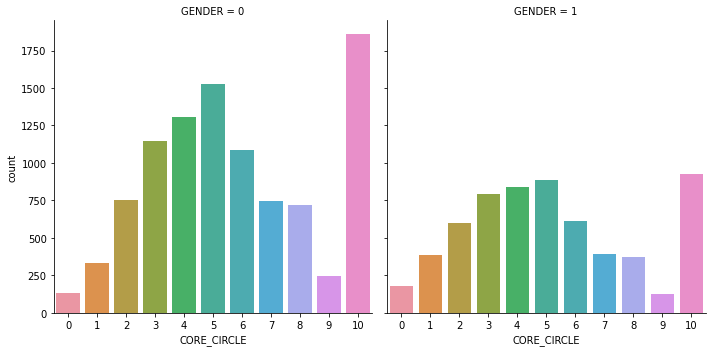

In [33]:
ax = sns.catplot(x="CORE_CIRCLE", kind="count", col = "GENDER", data=data)

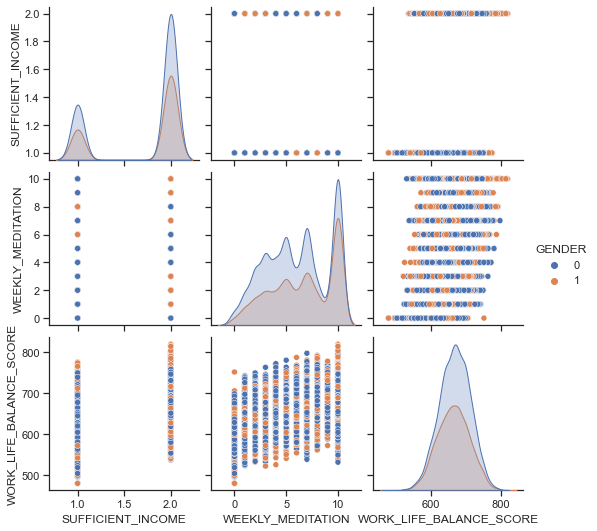

In [34]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,vars = [ 'SUFFICIENT_INCOME','WEEKLY_MEDITATION','WORK_LIFE_BALANCE_SCORE'],
hue="GENDER")
plt.show()

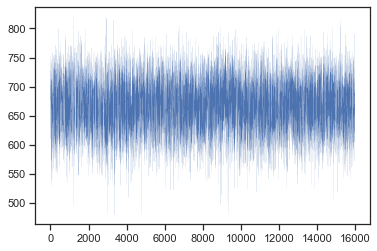

In [35]:
data['WORK_LIFE_BALANCE_SCORE'].plot(linewidth=0.07)
plt.show()

El puntaje de equilibrio entre el trabajo y la vida personal es el total de las cinco categorías: un puntaje bajo está por debajo de 550, un puntaje bueno está por encima de 680, un puntaje excelente está por encima de 700. Obtenga más información sobre los mecanismos detrás de nuestro bienestar con la Guía de vida 360 , y da el siguiente paso para cambiar tu vida httpsamzn.to2G4SnGp

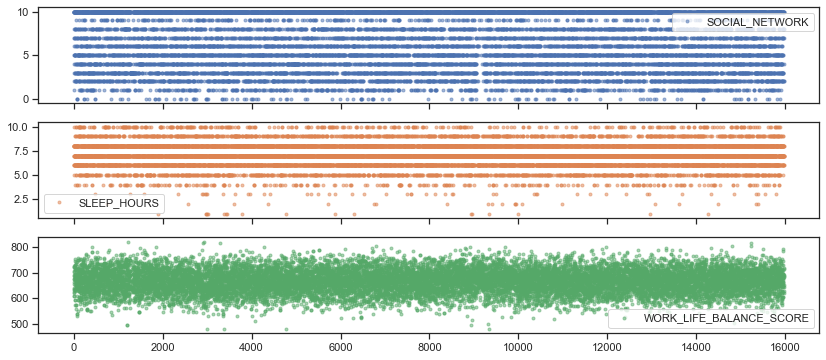

In [36]:
cols_to_plot = ['SOCIAL_NETWORK', 'SLEEP_HOURS', 'WORK_LIFE_BALANCE_SCORE']
axes = data[cols_to_plot].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)

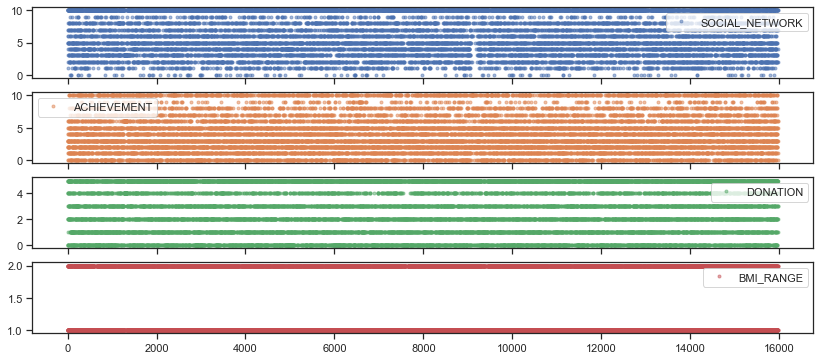

In [37]:
cols_to_plot = ['SOCIAL_NETWORK','ACHIEVEMENT','DONATION','BMI_RANGE']
axes = data[cols_to_plot].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)

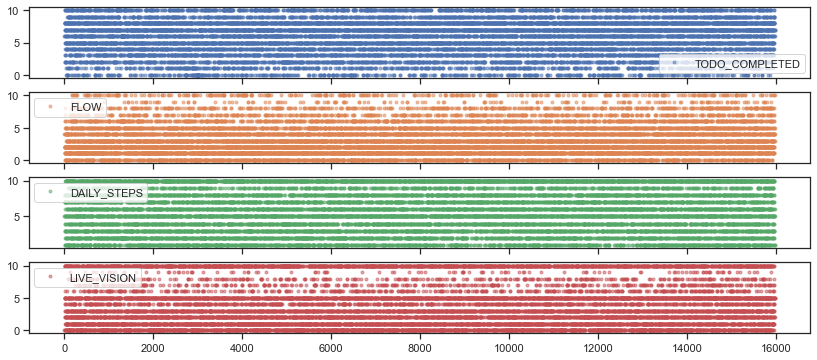

In [38]:
cols_to_plot = ['TODO_COMPLETED','FLOW','DAILY_STEPS','LIVE_VISION']
axes = data[cols_to_plot].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)

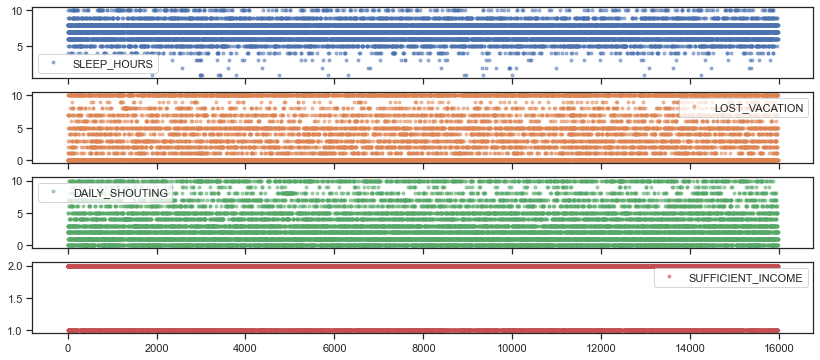

In [39]:
cols_to_plot = ['SLEEP_HOURS','LOST_VACATION','DAILY_SHOUTING','SUFFICIENT_INCOME']
axes = data[cols_to_plot].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)

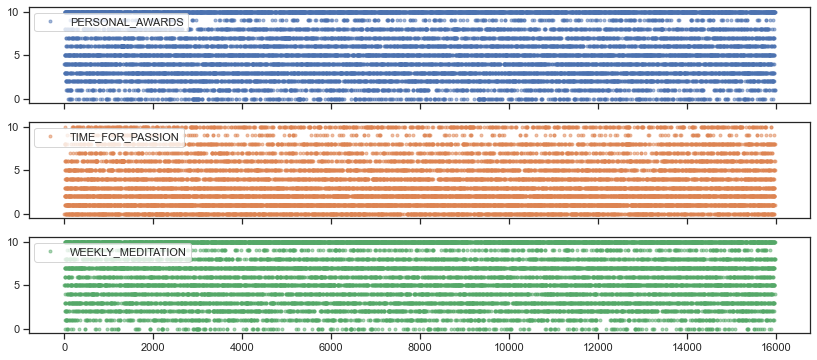

In [40]:
cols_to_plot = ['PERSONAL_AWARDS','TIME_FOR_PASSION','WEEKLY_MEDITATION']
axes = data[cols_to_plot].plot(marker='.', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)

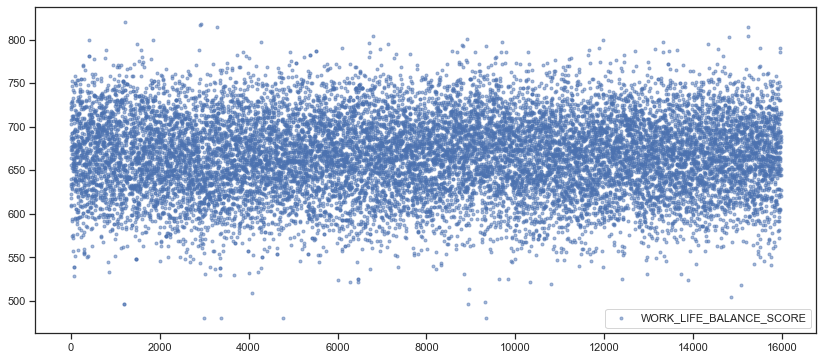

In [41]:
cols_to_plot = ['WORK_LIFE_BALANCE_SCORE']
axes = data[cols_to_plot].plot(marker='.', alpha=0.5,linestyle='None',figsize=(14, 6), subplots=True)


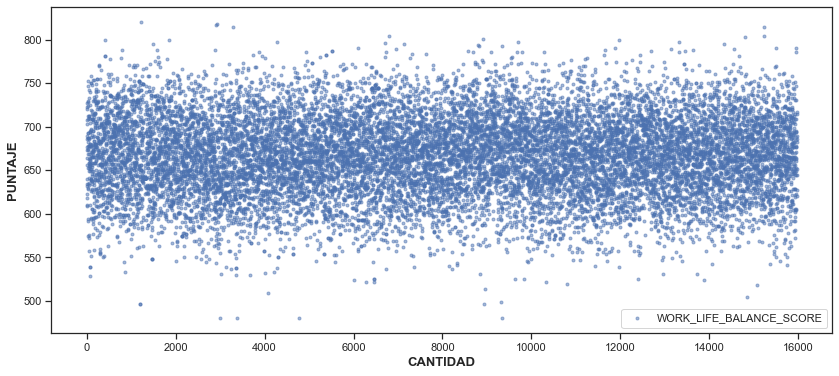

In [42]:
cols_to_plot = ['WORK_LIFE_BALANCE_SCORE']
axes = data[cols_to_plot].plot(marker='.', alpha=0.5,linestyle='None',figsize=(14, 6), subplots=True)
plt.xlabel('CANTIDAD', fontsize=13, fontweight="bold")
plt.ylabel('PUNTAJE',  fontsize=13, fontweight="bold")
# plt.title('PUNTAJE ÍNDICE DE BALANCE VIDA-TRABAJO', fontsize=15, fontweight="bold" )
plt.show()

******************************************

In [43]:
df = pd.read_csv(path_casa)

In [44]:
df.drop({'Timestamp'}, axis=1, inplace=True) 
df.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,36 to 50,Female,655.6


In [45]:
df6 = df.pivot_table(values='TIME_FOR_PASSION', index=['AGE'], columns=['GENDER'], )
df6.head()

GENDER,Female,Male
AGE,,
21 to 35,3.322508,3.308142
36 to 50,3.209726,3.257969
51 or more,3.421650,3.573248
Less than 20,3.127700,3.653846


In [46]:
colomn = df.columns
colomn

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [47]:
def percentage(data_p):
    '''toma el conjunto de datos y devuelve un conjunto de datos con todos los valores convertidos a su porcentaje por columna'''
    summ = data_p.sum(axis=0)
    data_p = data_p * 100 / summ
    return data_p

In [48]:
# Calculate for each one of the age ranges the percentage of respondents for the different numbers of daily hours of  stress
data_age = pd.concat([data['DAILY_STRESS'] , pd.get_dummies(data['AGE'])] ,axis = 1).groupby('DAILY_STRESS').sum()
data_age.index.name='DAILY_STRESS'
data_age.columns.name='RANGO DE EDAD' 
data_age=percentage(data_age)

data_age

RANGO DE EDAD,0,1,2,3
DAILY_STRESS,,,,
0,5.992303,3.536925,3.243824,5.899705
1,16.162727,14.704438,13.404941,19.528024
2,19.351292,22.040282,21.632653,20.707965
3,26.717977,28.704765,28.055854,25.162242
4,18.306762,18.486982,19.720730,17.109145
5,13.468939,12.526609,13.941998,11.592920


La comparación de los 5 niveles de estrés para los 4 rangos de edad, muestra que las personas entre 21 y 35 años tienen el mayor porcentaje de personas muy estresadas con un 28.7 % de ellas con 3 horas diarias de estrés. Le siguen de cerca las del grupo de 36 a 50 años que el 28 % de ellos tienen más de 3 horas de estrés diario.

In [49]:
# Calculate for each one of the age ranges the percentage of respondents for the different numbers of daily hours of  stress
data_age = pd.concat([data['DAILY_STRESS'] , pd.get_dummies(data['AGE'])] ,axis = 1).groupby('DAILY_STRESS').sum()
data_age.index.name='DAILY_STRESS'
data_age.columns.name='RANGO DE EDAD' 
data_age

RANGO DE EDAD,0,1,2,3
DAILY_STRESS,,,,
0,109.0,216.0,151.0,200.0
1,294.0,898.0,624.0,662.0
2,352.0,1346.0,1007.0,702.0
3,486.0,1753.0,1306.0,853.0
4,333.0,1129.0,918.0,580.0
5,245.0,765.0,649.0,393.0


In [50]:
colomn = df.columns
colomn

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [51]:
df2 = df.pivot_table(values='BMI_RANGE', index=['AGE'], columns=['GENDER'] )
df2.head()

GENDER,Female,Male
AGE,,
21 to 35,1.357809,1.327620
36 to 50,1.465046,1.521842
51 or more,1.525535,1.524113
Less than 20,1.226291,1.224138


Si el índice de masa corporal es menor a 25 se elige el número 1 si el índice de masa corporal es mayor a 25 se elige el número 2. 
Si el indice de masa corporal es mayor a 25 significa sobrepeso, por lo tanto mientras mayor se el número mayor es el sobrepeso.
Se observa que tanto en la mujeres como en los hombres el sobrepeso es mayot en el rango etario mayot a 51 años. En el rango de edad desde los 36 hasta los 50 años hay mayor sobrepeso en las mujeres que en los hombres

In [52]:
df_body= pd.read_csv(path_casa)
df_body.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [53]:
df_body['AGE']=df_body['AGE'].replace('Less than 20', '20 or less')

In [54]:
colomn = df.columns
colomn

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [55]:
df_body['MONTH'] = pd.DatetimeIndex(df_body['Timestamp']).month
#df.head(3)

In [56]:
df2 = df_body.pivot_table(values='BMI_RANGE', index=['AGE'], columns=['GENDER'], )
df2.head()

GENDER,Female,Male
AGE,,
20 or less,1.226291,1.224138
21 to 35,1.357809,1.327620
36 to 50,1.465046,1.521842
51 or more,1.525535,1.524113


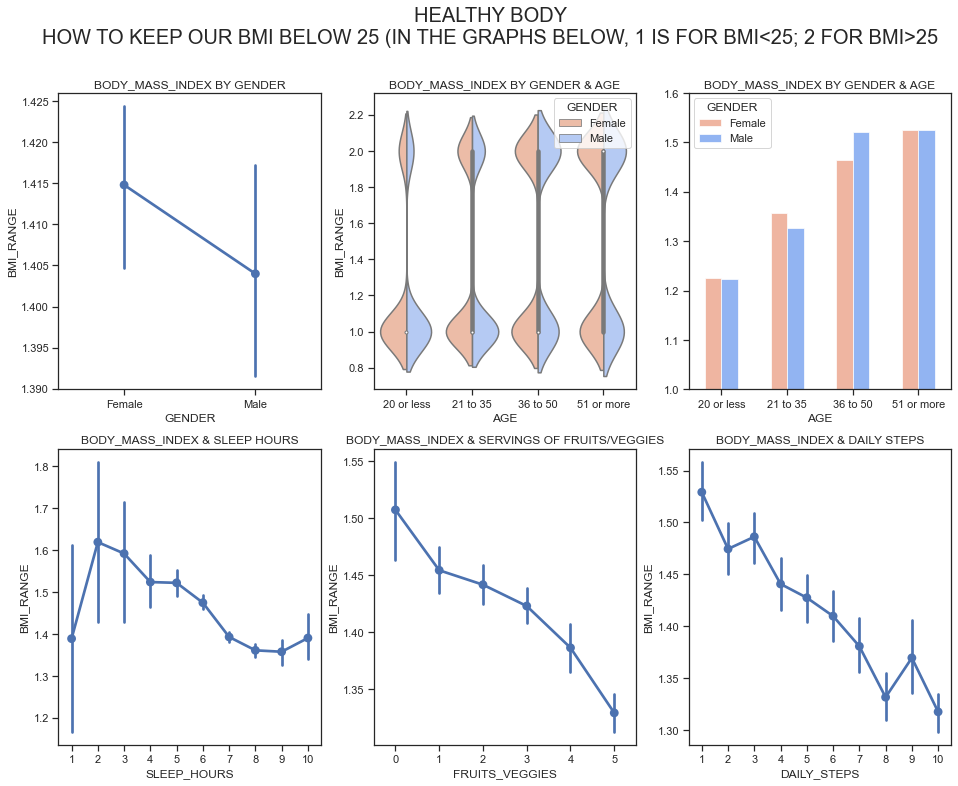

In [57]:
f,ax = plt.subplots(2,3,figsize=(16,12))
ax[0,0].set_title('BODY_MASS_INDEX BY GENDER')
ax[0,1].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[0,2].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[1,0].set_title('BODY_MASS_INDEX & SLEEP HOURS')
ax[1,1].set_title('BODY_MASS_INDEX & SERVINGS OF FRUITS/VEGGIES')
ax[1,2].set_title('BODY_MASS_INDEX & DAILY STEPS')

sns.pointplot(x = 'GENDER', y = 'BMI_RANGE',  data=df_body, ax = ax[0,0])
sns.violinplot(x = 'AGE', y = 'BMI_RANGE', hue = 'GENDER', data = df_body, palette='coolwarm_r',
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,1])

ax[0,2].set_ylim([1, 1.6])
df2.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,2])
ax[0,2].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'SLEEP_HOURS', y = 'BMI_RANGE',  data=df_body, ax = ax[1,0])
sns.pointplot(x = 'FRUITS_VEGGIES', y = 'BMI_RANGE', data=df_body, ax = ax[1,1])
sns.pointplot(x = 'DAILY_STEPS', y = 'BMI_RANGE',  data=df_body, ax = ax[1,2])

f.suptitle('HEALTHY BODY\nHOW TO KEEP OUR BMI BELOW 25 (IN THE GRAPHS BELOW, 1 IS FOR BMI<25; 2 FOR BMI>25', fontsize=20)
plt.show()

Expertise

In [58]:
df4 = df_body.pivot_table(values='ACHIEVEMENT', index=['AGE'], columns=['GENDER'], )
df4.head()

GENDER,Female,Male
AGE,,
20 or less,4.352113,4.086207
21 to 35,3.887602,3.781067
36 to 50,3.996285,4.156434
51 or more,4.012222,4.227480


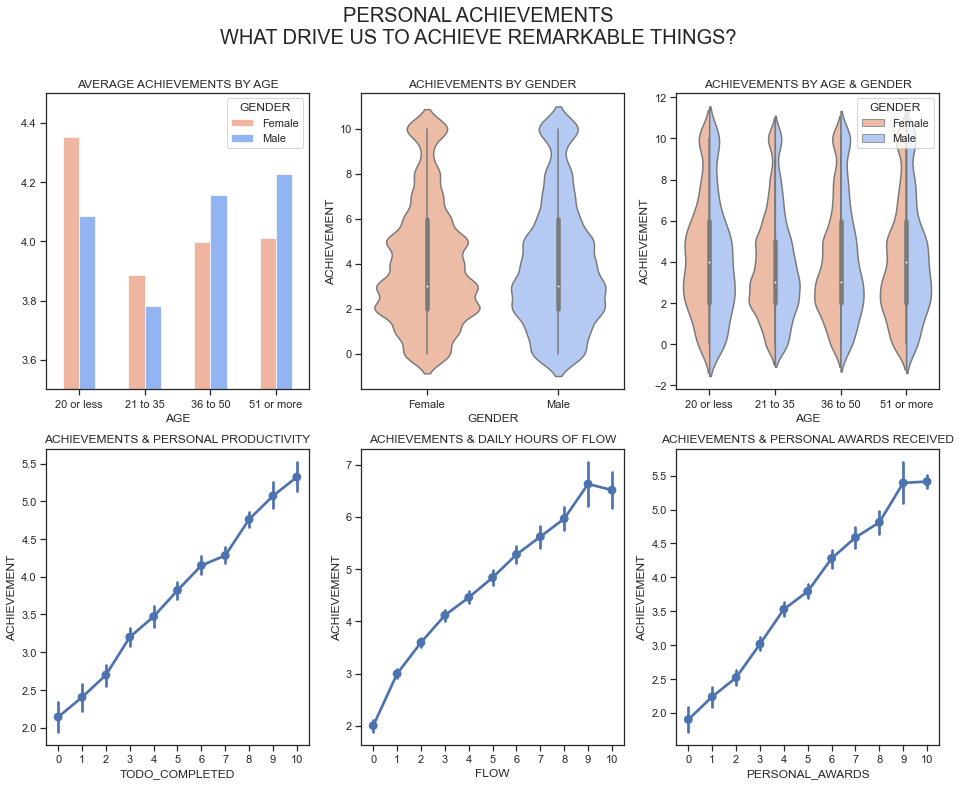

In [59]:
# EXPERTISE
f,ax = plt.subplots(2,3,figsize=(16,12))
ax[0,0].set_title('AVERAGE ACHIEVEMENTS BY AGE')
ax[0,1].set_title('ACHIEVEMENTS BY GENDER')
ax[0,2].set_title('ACHIEVEMENTS BY AGE & GENDER')
ax[1,0].set_title('ACHIEVEMENTS & PERSONAL PRODUCTIVITY')
ax[1,1].set_title('ACHIEVEMENTS & DAILY HOURS OF FLOW')
ax[1,2].set_title('ACHIEVEMENTS & PERSONAL AWARDS RECEIVED')

ax[0,0].set_ylim([3.5, 4.5])
df4.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='ACHIEVEMENT', palette='coolwarm_r', data=df_body, ax = ax[0,1])
sns.violinplot(x = 'AGE', y = 'ACHIEVEMENT', palette='coolwarm_r', hue = 'GENDER', data = df_body,
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
sns.pointplot(x = 'TODO_COMPLETED',  y = 'ACHIEVEMENT',  data=df_body, ax = ax[1,0])
sns.pointplot(x = 'FLOW',  y = 'ACHIEVEMENT',  data=df, ax = ax[1,1])
sns.pointplot(x = 'PERSONAL_AWARDS', y = 'ACHIEVEMENT',  data=df_body, ax = ax[1,2])

f.suptitle('PERSONAL ACHIEVEMENTS\nWHAT DRIVE US TO ACHIEVE REMARKABLE THINGS?', fontsize=20)
plt.show()

Observaciones
Las mujeres reportan un poco más de logros personales en su edad temprana, mientras que los hombres reportan más después de los 36 años.
Nuestra productividad diaria, la capacidad de fluir a lo largo del día y los premios personales, como diplomas y otros certificados, contribuyen a niveles más altos de logros personales.

Connection

In [60]:
df5 = df_body.pivot_table(values='CORE_CIRCLE', index=['AGE'], columns=['GENDER'], )
df5.head()

GENDER,Female,Male
AGE,,
20 or less,5.781221,5.484085
21 to 35,5.603784,5.105960
36 to 50,5.789936,5.159386
51 or more,5.798341,5.063694


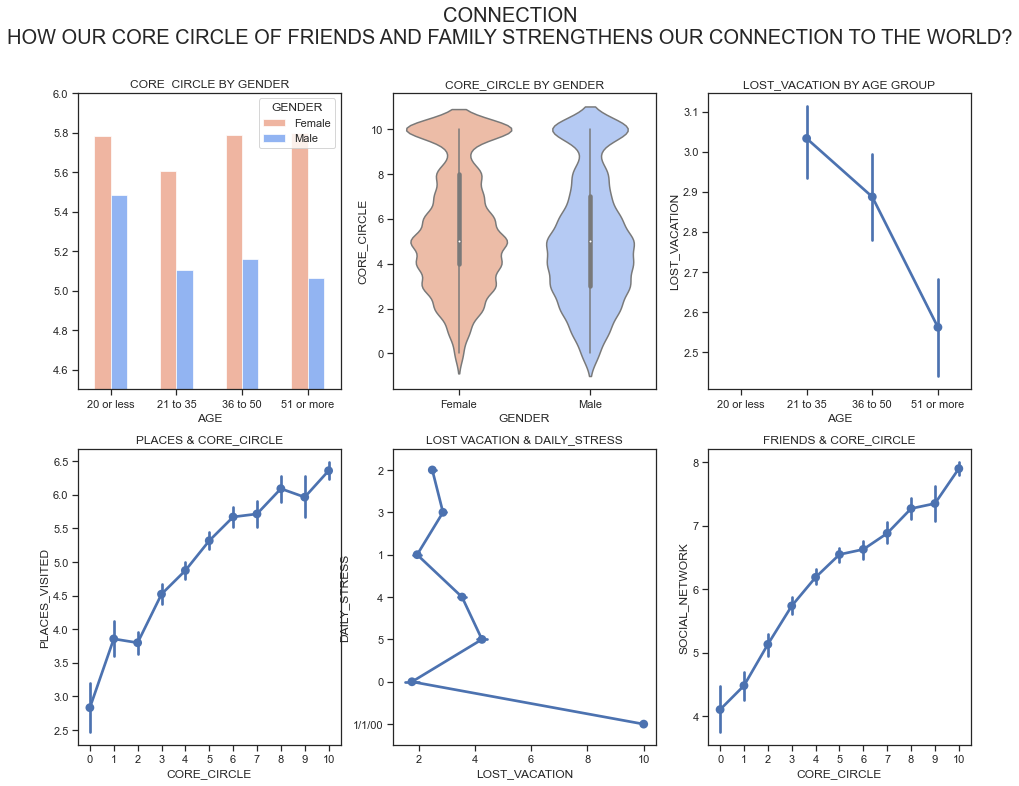

In [61]:
# CONNECTION
f,ax = plt.subplots(2,3,figsize=(16,12))
ax[0,0].set_title('CORE  CIRCLE BY GENDER')
ax[0,1].set_title('CORE_CIRCLE BY GENDER')
ax[0,2].set_title('LOST_VACATION BY AGE GROUP')
ax[1,0].set_title('PLACES & CORE_CIRCLE')
ax[1,1].set_title('LOST VACATION & DAILY_STRESS')
ax[1,2].set_title('FRIENDS & CORE_CIRCLE')

ax[0,0].set_ylim([4.5, 6])
df5.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='CORE_CIRCLE', palette='coolwarm_r', data=df, ax = ax[0,1])
sns.pointplot(x = 'AGE', y = 'LOST_VACATION',order=['20 or less', '21 to 35', '36 to 50', '51 or more'], data = df, ax = ax[0,2])
sns.pointplot(x = 'CORE_CIRCLE',  y = 'PLACES_VISITED',    data=df, ax = ax[1,0])
sns.pointplot(x = 'LOST_VACATION',  y = 'DAILY_STRESS',    data=df, ax = ax[1,1])
sns.pointplot(x = 'CORE_CIRCLE',  y = 'SOCIAL_NETWORK',    data=df, ax = ax[1,2])

f.suptitle('CONNECTION\nHOW OUR CORE CIRCLE OF FRIENDS AND FAMILY STRENGTHENS OUR CONNECTION TO THE WORLD?', fontsize=20)
plt.show()

Observaciones
Las mujeres parecen tener un círculo más fuerte de amigos y familiares que los hombres.
Las personas en el grupo de edad de 21 a 35 años pierden un máximo de días de vacaciones, en comparación con otros grupos de edad.
En general, el nivel de su estrés aumenta a medida que perdemos más días de vacaciones. Pero hay una ligera caída entre 7 y 9 días para las vacaciones perdidas, como si perder seis o muchos más días de vacaciones ya no tuviera ningún impacto en el nivel de estrés.

Passion

In [62]:
df6 = df_body.pivot_table(values='TIME_FOR_PASSION', index=['AGE'], columns=['GENDER'], )
df6.head()

GENDER,Female,Male
AGE,,
20 or less,3.127700,3.653846
21 to 35,3.322508,3.308142
36 to 50,3.209726,3.257969
51 or more,3.421650,3.573248


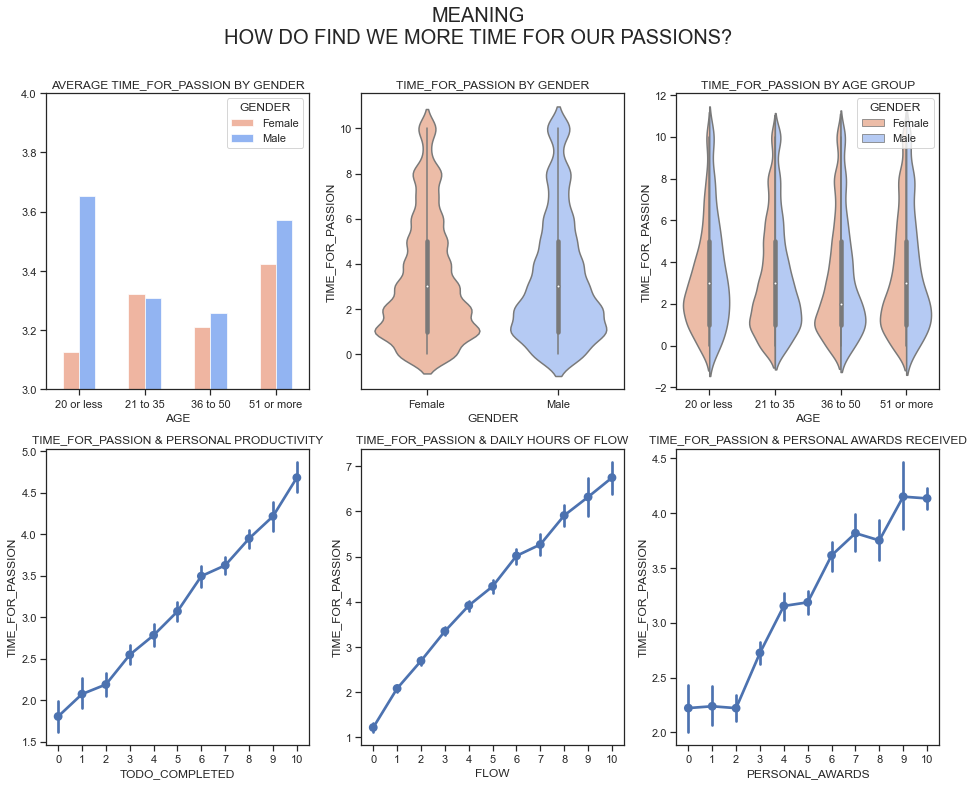

In [63]:
# PASSION
f,ax = plt.subplots(2,3,figsize=(16,12))
ax[0,0].set_title('AVERAGE TIME_FOR_PASSION BY GENDER')
ax[0,1].set_title('TIME_FOR_PASSION BY GENDER')
ax[0,2].set_title('TIME_FOR_PASSION BY AGE GROUP')
ax[1,0].set_title('TIME_FOR_PASSION & PERSONAL PRODUCTIVITY')
ax[1,1].set_title('TIME_FOR_PASSION & DAILY HOURS OF FLOW')
ax[1,2].set_title('TIME_FOR_PASSION & PERSONAL AWARDS RECEIVED')

ax[0,0].set_ylim([3, 4])
df6.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='TIME_FOR_PASSION', palette='coolwarm_r', data=df_body, ax = ax[0,1])
sns.violinplot(x = 'AGE', y = 'TIME_FOR_PASSION', palette='coolwarm_r', hue = 'GENDER', data = df_body,
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
sns.pointplot(x = 'TODO_COMPLETED',  y = 'TIME_FOR_PASSION',  data=df_body, ax = ax[1,0])
sns.pointplot(x = 'FLOW',  y = 'TIME_FOR_PASSION',  data=df_body, ax = ax[1,1])
sns.pointplot(x = 'PERSONAL_AWARDS', y = 'TIME_FOR_PASSION',  data=df_body, ax = ax[1,2])

f.suptitle('MEANING\nHOW DO FIND WE MORE TIME FOR OUR PASSIONS?', fontsize=20)
plt.show()

Observaciones
Los hombres parecen encontrar más tiempo para su pasión, especialmente en edades más jóvenes y mayores.
Los tres factores que más se correlacionan con nuestra capacidad para encontrar tiempo para nuestras pasiones son:
Nuestra productividad personal diaria
Flujo diario
Los premios personales que recibimos